<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [2]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [3]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [4]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [9]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [8]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [10]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [11]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [13]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [19]:
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
df = df.drop(['ID'], axis=1)

### Task 4: Data Prep & Start H2O

In [26]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_yulo1o9
  JVM stdout: /tmp/tmp_yulo1o9/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmp_yulo1o9/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,4 months and 26 days !!!
H2O_cluster_name:,H2O_from_python_rhyme_6zskko
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [29]:
h2o_df =h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [30]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [32]:
train, test = h2o_df.split_frame(ratios=[.75])

x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Task 5: Run H2O AutoML

In [33]:
from h2o.automl import H2OAutoML

In [ ]:
df.TERM_DEPOSIT.value_counts()

In [47]:
aml = H2OAutoML(max_runtime_secs=600,
               balance_classes=True,
                stopping_metric='logloss',
               project_name='Final',
                seed=1)
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
14:09:48.16: New models will be added to existing leaderboard Final@@TERM_DEPOSIT (leaderboard frame=null) with already 26 models.

██████████████████████████████████████████████████████
14:19:34.166: StackedEnsemble_BestOfFamily_AutoML_20201010_140948 [StackedEnsemble best (built using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.


14:19:35.171: StackedEnsemble_AllModels_AutoML_20201010_140948 [StackedEnsemble all (built using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.

██| 100%
CPU times: user 1min 14s, sys: 1.18 s, total: 1min 16s
Wall time: 9min 48s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [48]:
lb =  aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201010_135228,0.935186,0.218783,0.632375,0.16627,0.25522,0.0651371
StackedEnsemble_AllModels_AutoML_20201010_135228,0.933909,0.211874,0.632327,0.168212,0.252852,0.0639341
XGBoost_grid__1_AutoML_20201010_135228_model_2,0.933745,0.199341,0.627486,0.155283,0.250195,0.0625974
XGBoost_grid__1_AutoML_20201010_140948_model_2,0.933745,0.199341,0.627486,0.155283,0.250195,0.0625974
GBM_grid__1_AutoML_20201010_135228_model_1,0.932396,0.20031,0.617294,0.179798,0.250975,0.0629887
GBM_grid__1_AutoML_20201010_140948_model_1,0.932396,0.20031,0.617294,0.179798,0.250975,0.0629887
XGBoost_3_AutoML_20201010_140948,0.931915,0.201442,0.623561,0.169343,0.250576,0.0627882
GBM_grid__1_AutoML_20201010_135228_model_2,0.93132,0.207471,0.625424,0.168145,0.255541,0.0653012
XGBoost_3_AutoML_20201010_135228,0.930707,0.202998,0.622015,0.171476,0.251081,0.0630417
GBM_grid__1_AutoML_20201010_140948_model_2,0.930691,0.207855,0.624577,0.169128,0.255695,0.0653797


In [57]:
se = aml.leader 
metalearner = h2o.get_model(se.metalearner()['name'])

In [56]:
metalearner.varimp()

[('GBM_grid__1_AutoML_20201010_135228_model_1',
  0.7029085782801199,
  1.0,
  0.469473664850019),
 ('XGBoost_grid__1_AutoML_20201010_135228_model_2',
  0.631262438928219,
  0.8980718950290734,
  0.42162110385810064),
 ('DRF_1_AutoML_20201010_135228',
  0.072618456120615,
  0.10331138125856736,
  0.04850197278017719),
 ('DeepLearning_grid__3_AutoML_20201010_135228_model_1',
  0.06166810002144766,
  0.08773274637270392,
  0.04118821396695053),
 ('XRT_1_AutoML_20201010_135228',
  0.028769280694064453,
  0.040928908229370696,
  0.019215044544752764),
 ('GLM_1_AutoML_20201010_135228', 0.0, 0.0, 0.0)]

### Task 7: Base Learner XGBoost Model Exploration

In [69]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20201010_135228_model_2')

In [70]:
metalearner.varimp()

[('GBM_grid__1_AutoML_20201010_135228_model_1',
  0.7029085782801199,
  1.0,
  0.469473664850019),
 ('XGBoost_grid__1_AutoML_20201010_135228_model_2',
  0.631262438928219,
  0.8980718950290734,
  0.42162110385810064),
 ('DRF_1_AutoML_20201010_135228',
  0.072618456120615,
  0.10331138125856736,
  0.04850197278017719),
 ('DeepLearning_grid__3_AutoML_20201010_135228_model_1',
  0.06166810002144766,
  0.08773274637270392,
  0.04118821396695053),
 ('XRT_1_AutoML_20201010_135228',
  0.028769280694064453,
  0.040928908229370696,
  0.019215044544752764),
 ('GLM_1_AutoML_20201010_135228', 0.0, 0.0, 0.0)]

In [71]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06278498169526517
RMSE: 0.2505693151510479
LogLoss: 0.19899727090920008
Mean Per-Class Error: 0.1254994559705045
AUC: 0.935551599562581
AUCPR: 0.6124508781157777
Gini: 0.8711031991251621

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24931591583622825: 


,,no,yes,Error,Rate
0,no,9105.0,841.0,0.0846,(841.0/9946.0)
1,yes,308.0,1011.0,0.2335,(308.0/1319.0)
2,Total,9413.0,1852.0,0.102,(1149.0/11265.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.249316,0.637654,227.0
1,max f2,0.120089,0.745564,288.0
2,max f0point5,0.356629,0.606965,184.0
3,max accuracy,0.564919,0.908389,113.0
4,max precision,0.975322,1.000000,0.0
5,max recall,0.001075,1.000000,396.0
6,max specificity,0.975322,1.000000,0.0
7,max absolute_mcc,0.249316,0.591567,227.0
8,max min_per_class_accuracy,0.143075,0.867686,276.0
9,max mean_per_class_accuracy,0.120089,0.874501,288.0



Gains/Lift Table: Avg response rate: 11.71 %, avg score: 11.64 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010031,0.876362,6.273155,6.273155,0.734513,0.921513,0.734513,0.921513,0.062926,0.062926,527.315545,527.315545
1,,2,0.020062,0.808824,6.575476,6.424316,0.769912,0.844294,0.752212,0.882904,0.065959,0.128886,557.547619,542.431582
2,,3,0.030004,0.753204,6.024146,6.291715,0.705357,0.779427,0.736686,0.848616,0.059894,0.188779,502.414573,529.171508
3,,4,0.040036,0.694913,5.290613,6.040885,0.619469,0.720195,0.707317,0.816439,0.053071,0.241850,429.061303,504.088463
4,,5,0.050067,0.647746,5.668514,5.966278,0.663717,0.671058,0.698582,0.787311,0.056861,0.298711,466.851396,496.627845
5,,6,0.100044,0.446525,4.657109,5.312274,0.545293,0.547965,0.622005,0.667744,0.232752,0.531463,365.710877,431.227443
6,,7,0.150022,0.292051,3.792434,4.805961,0.444050,0.365034,0.562722,0.566901,0.189538,0.721001,279.243385,380.596067
7,,8,0.200000,0.173204,2.305800,4.181198,0.269982,0.226395,0.489569,0.481812,0.115239,0.836240,130.579978,318.119788
8,,9,0.300044,0.067752,1.060939,3.140804,0.124224,0.109900,0.367751,0.357805,0.106141,0.942381,6.093926,214.080395
9,,10,0.400000,0.031425,0.394413,2.454511,0.046181,0.047242,0.287395,0.280199,0.039424,0.981804,-60.558688,145.451099


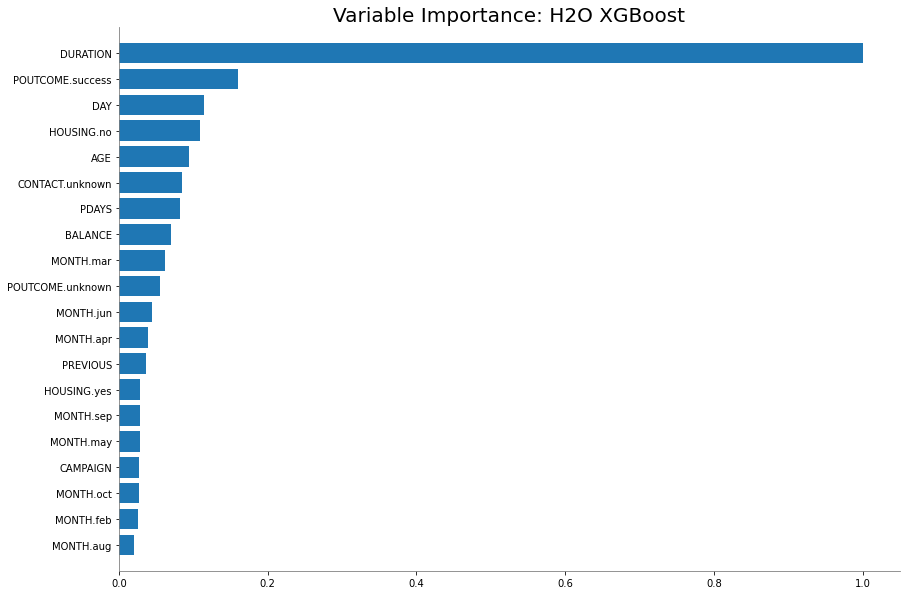

In [72]:
model.varimp_plot(num_of_features=20)